# Laporan Proyek Machine Learning
### Nama :  Fauzan Fadhillah Arisandi
### Nim :   211351055
### Kelas : Pagi B

## Domain Proyek

Memprediksi harga laptop merupakan upaya yang krusial dan signifikan.Semakin kesini laptop menjadi sering digunakan karena laptop mudah di bawa kemana-mana , tidak seperti komputer.Maka dari itu banyak yang menginginkan untuk mempunyai laptop tetapi sebagian besar berkeinginan untuk memiliki spek laptop yang bagus tetapi tidak bisa memprediksi harganya.Bagian yang penting dari sebuah laptop biasanya merek dan model, RAM, ROM, GPU, CPU, dan sebagainya. Beberapa perusahaan laptop berkinginan untuk membandingkan harga brand nya dengan brand yang lain , untuk mengetahui harga yang dapat dijangkau oleh pembeli sehingga memiliki peluang besar pembeli membeli brand nya.

## Business Understanding
Dikarnakan laptop itu praktis , mudah di bawa kemana-mana, dan banyak yang menginginkan nya.Maka di butuhkan penelitian yang dapat memprediksi harga laptop , yang sesuai dengan spesifikasi laptop yang pembeli inginkan sehingga pembeli memiliki gambaran pada modal harga laptop yang di inginkan. Perusahaan membutuhkan wawasan pada harga laptop brand lain, supaya dapat membandingkan harga laptop brand nya dengan yang lain sehingga dapat mengetahui harga yang terjangkau untuk pembeli.

### Problem Statements

Menjelaskan pernyataan masalah latar belakang:
- Pembeli tidak dapat memprediksi harga dengan spek laptop yang di inginkan
- Perusahaan tidak dapat mengetahui harga laptop brand lain

### Goals

Menjelaskan tujuan dari pernyataan masalah:
- Membuat penelitian untuk dapat memprediksi harga laptop yang dinginkan pembeli
- Mendapatkan wawasan pada harga laptop brand lain


## Data Understanding
[Laptop Prices Dataset][https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset/data)


pertama-tama saya upload kaggle.json untuk memiliki akses pada kaggle

Selanjutnya membuat direktori dan permission pada skrip ini

Lalu mendownload dataset tersebut

Mengunzip dataset

Mengimpor Library yang dibutuhkan yakni matplotlib , seaborn ,pandas dan numpy

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

membaca data csv

In [2]:
df = pd.read_csv('laptopprices/laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


Memeriksa berapa baris dan kolom

In [3]:

df.shape

(823, 19)

memeriksa apakah ada nilai null/NaN pada dataset

In [4]:

df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

Mengetahui deskripsi pada data

In [5]:

df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

Menemukan duplikasi baris,lalu di hilangkan , lalu menunjukan hasil setelah di hilangkan/di drop

In [7]:

df.duplicated().sum()

df= df.drop_duplicates()

df.shape

(802, 19)

### Variabel-variabel pada Laptop Prices Dataset adalah sebagai berikut:
- brand             : Merupakan merek laptop [Contoh: Asus,Lenovo]
- processor_brand   : Merupakan merek processor [Contoh: Intel,AMD]
- processor_name    : Merupakan nama processor [Contoh: Core i3, Celeron Dual]
- processor_gnrtn   : Merupakan generasi processor [Contoh: 10th,11th]
- ram_gb            : Merupakan kapasitas memori jangka pendek [Contoh: 4 GB, 8 GB]
- ram _type         : Merupakan tipe ram [Contoh: DDR4,LPDDR4X]
- ssd               : Merupakan perangkat untuk menyimpan data yang dapat membaca dan menulis data hingga 550 MB/s[Contoh: 512 GB, 1024 GB]
- hdd               : Merupakan perangkat untuk menyimpan data yang dapat membaca dan menulis data hingga kecepatan rata-rata 60 MB/s [Contoh: 1024 GB]
- os                : Merupakan sistem operasi untuk mengelola memori komputer dan proses-proses yang berjalan di komputer [Contoh: Windows]
- os_bit            : Merupakan satuan data sistem operasi [contoh: 32-bit, 64-bit]
- graphic_card_gb   : Merupakan kapasitas kartu grafis [Contoh: 2 GB, 4 GB]
- weight            : Merupakan berat laptop [Contoh: Casual]
- warranty          : Merupakan garansi pada laptop [Contoh: 1 year , 2 years]
- Touchscreen       : Merupakan tipe laptop dengan layar sentuh [Contoh: Yes, No]
- msoffice          : Merupakan microsoft office pada laptop yang tujuannya meliputi mengolah data [Contoh: Yes,No]
- Price             : Merupakan harga laptop [Contoh: 57990,76990]
- rating            : Merupakan nilai pada laptop [Contoh: 3 stars, 4 stars]
- Number of Ratings : Merupakan berapa kali dilakukan penilaian pada laptop [Contoh: 14,739]
- Number of Reviews : Merupakan berapa kali dilakukan ulasan pada laptop [Contoh: 100,19]

Mengetahui harga laptop berdasarkan Brand

<AxesSubplot: xlabel='brand', ylabel='Price'>

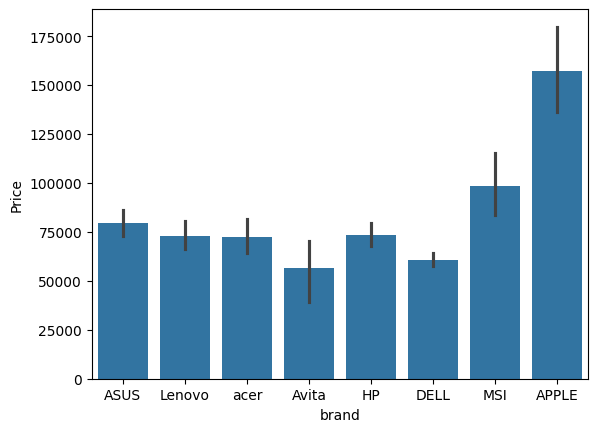

In [8]:

df['brand'].value_counts()
sns.barplot(data = df , x=df['brand'],y=df['Price'])

<AxesSubplot: xlabel='processor_brand', ylabel='Price'>

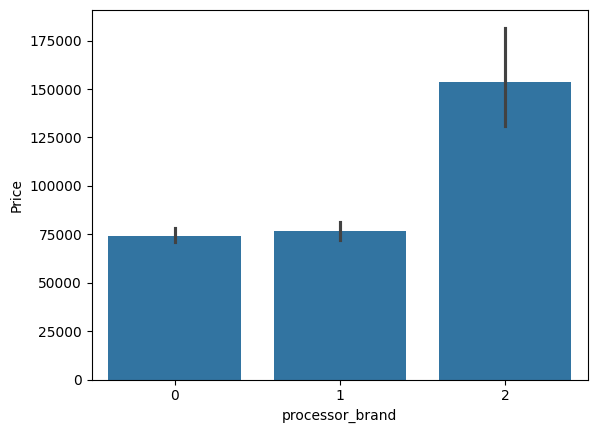

In [40]:
sns.barplot(data=df,x=df['processor_brand'],y=df["Price"])

<AxesSubplot: xlabel='processor_name', ylabel='Price'>

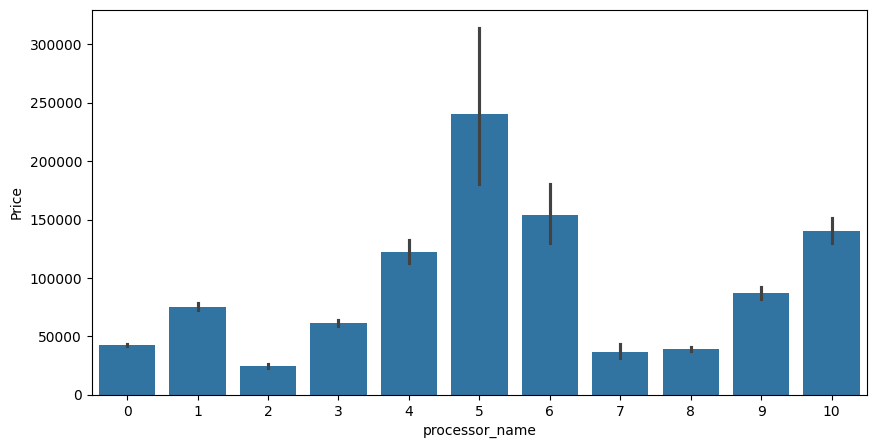

In [41]:


plt.figure(figsize=(10,5))
sns.barplot(data=df,x=df['processor_name'],y=df['Price'],hue=None)



## Data Preparation

Untuk menyiapkan data yang akhirnya akan dijadikan model . perlu di lakukan konversi data kategorikal ke data numerikal.
Langkah - langkah yang perlu dilakukan adalah:
1.Memilih kolom/Atribut data yang krusial/penting yang berguna di dalam memprediksi harga
2.Merubah isi kolom tipe data kategorikal tersebut ke tipe data numerikal

## Menunjukan nilai unik pada kolom yang krusial dalam memprediksi harga
Yakni kolom brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb

In [9]:
tdk_perlu = ['weight','warranty','rating','Number of Ratings','Number of Reviews']
df = df.drop(columns=tdk_perlu)

In [10]:
df['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [11]:
df['processor_brand'].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [12]:
df['processor_name'].unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

In [13]:
df['processor_gnrtn'].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [14]:
df['ram_gb'].unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

In [15]:
df['ram_type'].unique()

array(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],
      dtype=object)

In [16]:
df['hdd'].unique()

array(['1024 GB', '0 GB', '512 GB', '2048 GB'], dtype=object)

In [17]:
df['ssd'].unique()

array(['0 GB', '512 GB', '256 GB', '128 GB', '1024 GB', '2048 GB',
       '3072 GB'], dtype=object)

In [18]:
df['os'].unique()

array(['Windows', 'DOS', 'Mac'], dtype=object)

In [19]:
df['os_bit'].unique()

array(['64-bit', '32-bit'], dtype=object)

In [20]:
df['graphic_card_gb'].unique()

array(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'], dtype=object)

In [21]:
df['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['msoffice'].unique()

array(['No', 'Yes'], dtype=object)

Merubah Nilai kategorikal ke nilai numerikal pada kolom brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb

In [23]:

df['brand'].replace(['ASUS', 'Lenovo','acer','Avita','HP','DELL','MSI','APPLE'],[0,1,2,3,4,5,6,7], inplace=True)
df['processor_brand'].replace(['Intel', 'AMD', 'M1'],[0,1,2], inplace=True)
df['processor_name'].replace(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7','Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],[0,1,2,3,4,5,6,7,8,9,10], inplace=True)
df['processor_gnrtn'].replace(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th','12th'],[10,0,11,7,8,9,4,12], inplace=True)
df['ram_gb'].replace(['4 GB', '8 GB', '16 GB', '32 GB'],[4,8,16,32], inplace=True)
df['ram_type'].replace(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],[0,1,2,3,4,5], inplace=True)
df['hdd'].replace(['1024 GB', '0 GB', '512 GB', '2048 GB'],[1024,0,512,2048], inplace=True)
df['ssd'].replace(['0 GB', '512 GB', '256 GB', '128 GB', '1024 GB', '2048 GB','3072 GB'],[0,512,256,128,1024,2048,3072], inplace=True)
df['os'].replace(['Windows', 'DOS', 'Mac'],[0,1,2], inplace=True)
df['os_bit'].replace(['64-bit', '32-bit'],[64,32], inplace=True)
df['graphic_card_gb'].replace(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'],[0,2,4,6,8], inplace=True)
df['Touchscreen'].replace(['No', 'Yes'],[0,1], inplace=True)
df['msoffice'].replace(['No', 'Yes'],[0,1], inplace=True)


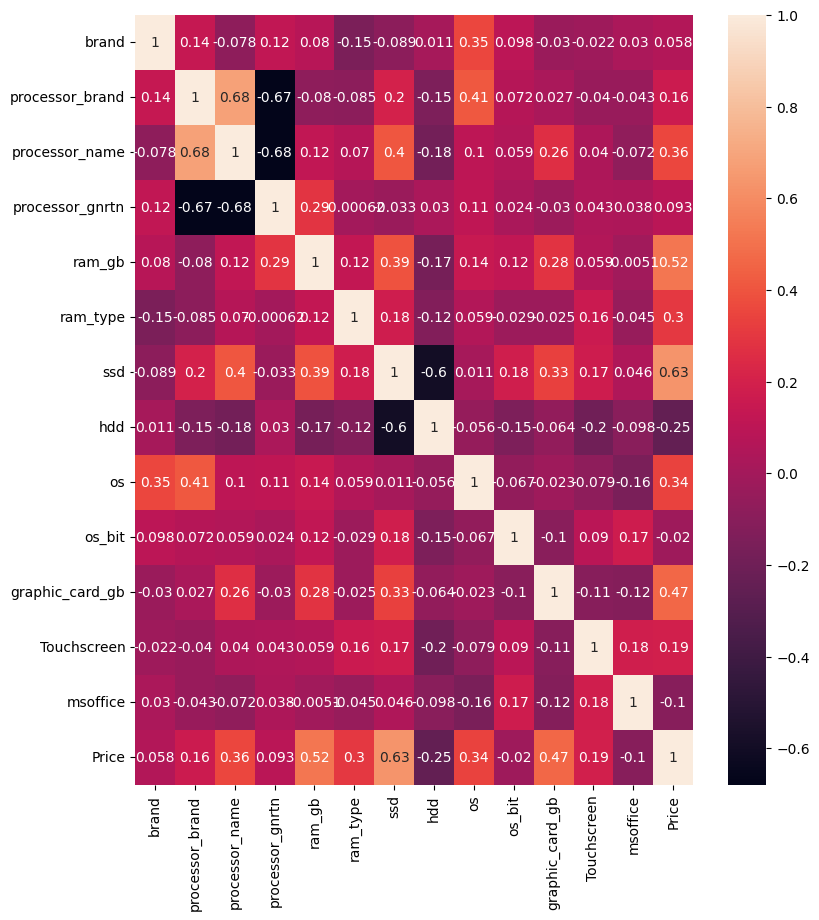

In [39]:
corr_matrix = df.corr()
plt.figure(figsize=(9,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Menunjukan kolom setelah di replace

In [25]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,Price
0,0,0,0,10,4,0,0,1024,0,64,0,0,0,34649
1,1,0,0,10,4,0,0,1024,0,64,0,0,0,38999
2,1,0,0,10,4,0,0,1024,0,64,0,0,0,39999
3,0,0,1,10,8,0,512,0,0,32,2,0,0,69990
4,0,0,2,0,4,0,0,512,0,64,0,0,0,26990


## Modeling


 Mengimpor train_test_split dari library sklearn dan Mengimpor LinearRegression dari library sklearn


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

menyingkatkan LinearRegression menjadi variable lr 

In [27]:
lr = LinearRegression()

setelah sebelum nya sudah ditentukan kolom/atribut yang krusial , lalu drop kolom Price (Yakni Variable dependen) pada dataframe

In [28]:
X = df.drop(['Price'], axis=1)

Masukan kolom Price pada variable y

In [29]:
y = df['Price']

lakukan split data , untuk data train dan data test. (Disini saya masukan data test 25% dan data train 75 %)

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Membuat Regresi Linier

In [31]:

lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('Akurasi model regresi linier = ') ,score 

Akurasi model regresi linier = 


(None, 0.7102914487783226)

Dari regresi linier menghasilkan akurasi 71%

In [32]:
input_data = np.array([[1,1,2,10,3,3,1024,512,1,64,2,1,1]])
prediction = lr.predict(input_data)
print('Prediksi Harga Laptop: ', prediction)

Prediksi Harga Laptop:  [173752.95413921]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)  
r2_DT

print(f"Precision = {r2_DT}")


Precision = 0.7102914487783226


## Evaluation

R-squared (R2) adalah ukuran statistik yang mewakili proporsi varians suatu variabel terikat yang dijelaskan oleh variabel bebas dalam model regresi.

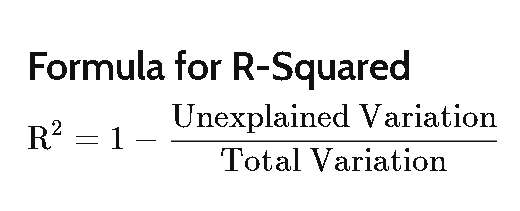

In [34]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)  
r2_DT

print(f"Precision = {r2_DT}")


Precision = 0.7102914487783226


didapatkan score 71% , sehingga dinyatakan bahwa variable dependen dengan variable independen itu berkolerasi tinggi

## Deployment


In [35]:
import pickle
filename = 'laptop-prices.sav'
pickle.dump(lr,open(filename,'wb'))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   brand            802 non-null    int64
 1   processor_brand  802 non-null    int64
 2   processor_name   802 non-null    int64
 3   processor_gnrtn  802 non-null    int64
 4   ram_gb           802 non-null    int64
 5   ram_type         802 non-null    int64
 6   ssd              802 non-null    int64
 7   hdd              802 non-null    int64
 8   os               802 non-null    int64
 9   os_bit           802 non-null    int64
 10  graphic_card_gb  802 non-null    int64
 11  Touchscreen      802 non-null    int64
 12  msoffice         802 non-null    int64
 13  Price            802 non-null    int64
dtypes: int64(14)
memory usage: 94.0 KB
